In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

weak = ["物理", "火", "冰", "雷", "风", "量子", "虚数"]

In [6]:
def build_weak_table() -> dict[str: list[str]]:
    with open("弱点参考.txt", 'r', encoding = "utf-8") as f:
        lines = f.readlines(); weak_table = {line.strip().split(':')[0]: line.strip().split(':')[1].split() for line in lines}
    return weak_table

weak_table = build_weak_table()

In [7]:
def weak_count(weak_table: dict[str: list[str]]) -> dict[str: int]:
    with open("千面英雄.txt", 'r', encoding = "utf-8") as f:
        lines = f.readlines(); weak_total = {w: 0 for w in weak}
        for line in lines:
            enemys = line.strip().split()
            for enemy in enemys:
                for w in weak_table[enemy]: weak_total[w] += 1
    return weak_total

weak_total = weak_count(weak_table)

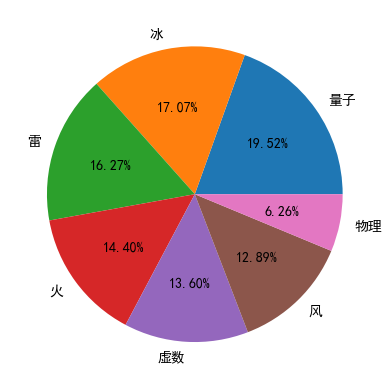

In [8]:
def weak_draw(weak_total: dict[str: int]) -> None:
    weaks = list(weak_total.keys()); nums = list(weak_total.values())
    for i in range(6):
        for j in range(6, i, -1):
            if nums[j] > nums[j - 1]:
                weaks[j], weaks[j - 1] = weaks[j - 1], weaks[j]
                nums[j], nums[j - 1] = nums[j - 1], nums[j]
    plt.pie(nums, labels = weaks, autopct = "%1.2f%%"); plt.show()

weak_draw(weak_total)